In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib notebook
from sklearn import model_selection
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
clf_tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
clf_tree.fit(X_train, y_train)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [37]:
df = pd.read_csv (r"C:\Users\Vera\Desktop\star pc\python\vezbi/datasets_iris.csv")
print(df)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [38]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
def inspect_data(data):  
    return pd.DataFrame({
        "Data Type":
        data.dtypes,
        "No of Levels":
        data.apply(lambda x: x.unique().shape[0], axis=0),
        "Number of missing values":
        data.isnull().sum(axis=0),
        "Levels":
        data.apply(lambda x: str(x.unique()), axis=0)
    })

In [40]:
 inspect_data(df)

,Data Type,No of Levels,Number of missing values,Levels
Id,int64,150,0,[1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 ...
SepalLengthCm,float64,35,0,[5.1 4.9 4.7 4.6 5.0 5.4 4.4 4.8 4.3 5.8 5.7 5...
SepalWidthCm,float64,23,0,[3.5 3.0 3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.0 4.4 3...
PetalLengthCm,float64,43,0,[1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.0 1.9 4.7 4.5 4...
PetalWidthCm,float64,22,0,[0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.0 1...
Species,object,3,0,['Iris-setosa' 'Iris-versicolor' 'Iris-virgini...


In [41]:
df.head()
df.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
123,124,6.3,2.7,4.9,1.8,Iris-virginica
87,88,6.3,2.3,4.4,1.3,Iris-versicolor
92,93,5.8,2.6,4.0,1.2,Iris-versicolor
36,37,5.5,3.5,1.3,0.2,Iris-setosa
58,59,6.6,2.9,4.6,1.3,Iris-versicolor
145,146,6.7,3.0,5.2,2.3,Iris-virginica
14,15,5.8,4.0,1.2,0.2,Iris-setosa
101,102,5.8,2.7,5.1,1.9,Iris-virginica
40,41,5.0,3.5,1.3,0.3,Iris-setosa
30,31,4.8,3.1,1.6,0.2,Iris-setosa


In [42]:
print(df.shape)
print(df.describe())

(150, 6)
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [43]:
df.groupby("Species").size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

<IPython.core.display.Javascript object>


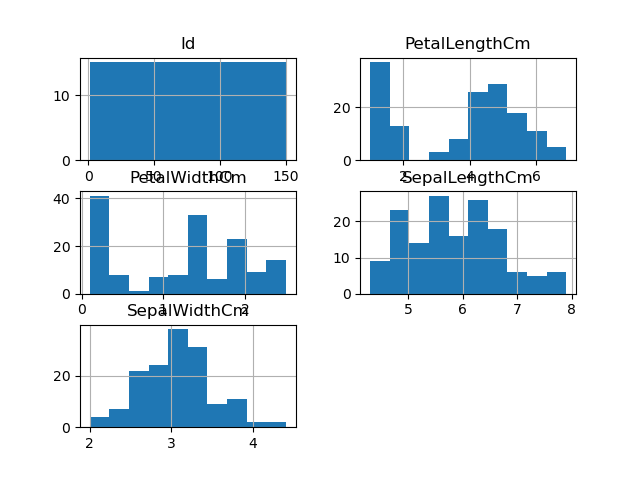

In [44]:
df.hist()
plt.show()

<IPython.core.display.Javascript object>


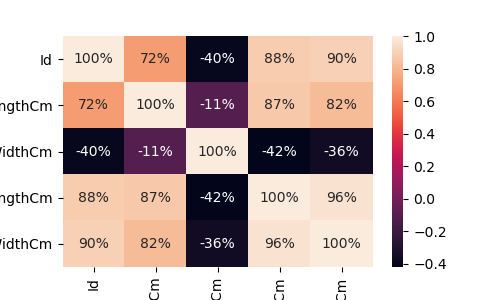

In [45]:
plt.figure(figsize=(5,3)) 
sns.heatmap(df.corr(),annot=True,fmt=".0%") #draws  heatmap with input as the correlation matrix calculted by(df.corr())
plt.show()

<IPython.core.display.Javascript object>


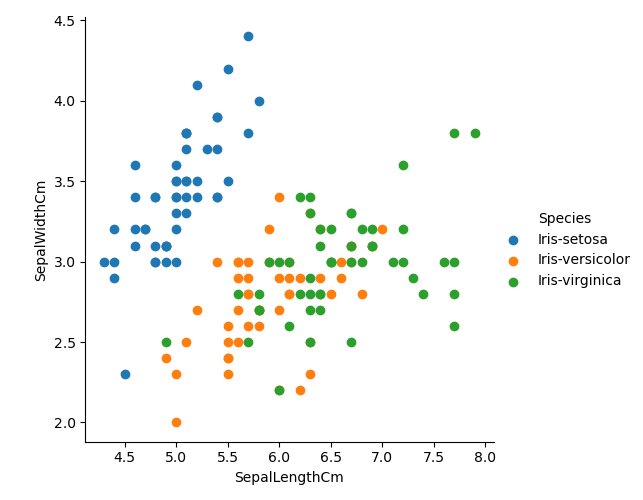

In [46]:
sns.FacetGrid(df, hue="Species", height=5).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()

<IPython.core.display.Javascript object>


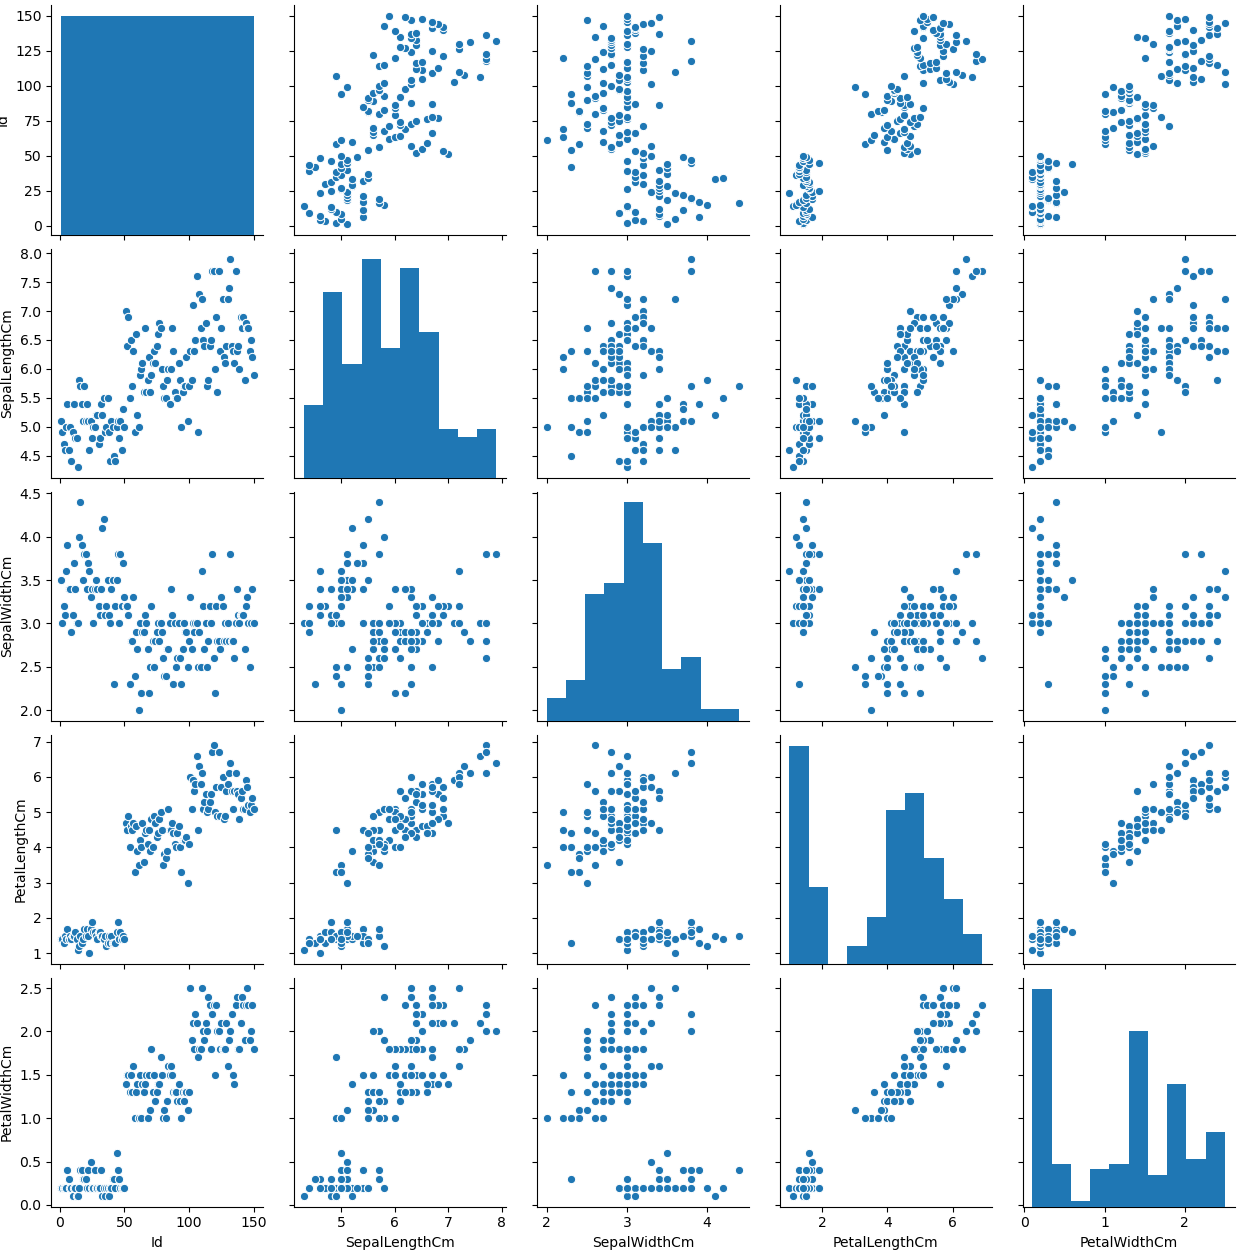

In [47]:
sns.pairplot(df,kind='scatter')

In [48]:
X=df.iloc[:,0:4]
Y=df["Species"]
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm
0,1,5.1,3.5,1.4
1,2,4.9,3.0,1.4
2,3,4.7,3.2,1.3
3,4,4.6,3.1,1.5
4,5,5.0,3.6,1.4


In [49]:
array = df.values

X = array[:,0:4]

Y = array[:,4]
Y=Y.astype('int')
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=0.2, random_state=1)

In [73]:
models=[]

models.append(('LR', LogisticRegression()))

models.append(('LDA', LinearDiscriminantAnalysis()))

models.append(('KNN', KNeighborsClassifier()))

models.append(('CART', DecisionTreeClassifier()))

models.append(('NB', GaussianNB()))

models.append(('SVM', SVC()))

results=[]

names=[]

for name, model in models:

    kfold = model_selection.KFold(n_splits=10, random_state=1)

    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')

    results.append(cv_results)

    names.append(name)

    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())


    print(msg)

C:\Users\Vera\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\Vera\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


LR: 0.955303 (0.044748)
LDA: 0.964394 (0.043658)
KNN: 0.963636 (0.060302)
CART: 1.000000 (0.000000)
NB: 0.973485 (0.040550)
SVM: 0.938636 (0.076094)


C:\Users\Vera\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\Vera\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\Vera\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\Vera\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is Fals

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25, random_state=1)

In [52]:
X_train

array([[62, 5.9, 3.0, 4.2],
       [93, 5.8, 2.6, 4.0],
       [113, 6.8, 3.0, 5.5],
       [3, 4.7, 3.2, 1.3],
       [142, 6.9, 3.1, 5.1],
       [44, 5.0, 3.5, 1.6],
       [11, 5.4, 3.7, 1.5],
       [61, 5.0, 2.0, 3.5],
       [117, 6.5, 3.0, 5.5],
       [145, 6.7, 3.3, 5.7],
       [120, 6.0, 2.2, 5.0],
       [109, 6.7, 2.5, 5.8],
       [70, 5.6, 2.5, 3.9],
       [136, 7.7, 3.0, 6.1],
       [57, 6.3, 3.3, 4.7],
       [81, 5.5, 2.4, 3.8],
       [124, 6.3, 2.7, 4.9],
       [134, 6.3, 2.8, 5.1],
       [107, 4.9, 2.5, 4.5],
       [147, 6.3, 2.5, 5.0],
       [51, 7.0, 3.2, 4.7],
       [148, 6.5, 3.0, 5.2],
       [86, 6.0, 3.4, 4.5],
       [31, 4.8, 3.1, 1.6],
       [102, 5.8, 2.7, 5.1],
       [95, 5.6, 2.7, 4.2],
       [65, 5.6, 2.9, 3.6],
       [90, 5.5, 2.5, 4.0],
       [92, 6.1, 3.0, 4.6],
       [126, 7.2, 3.2, 6.0],
       [49, 5.3, 3.7, 1.5],
       [14, 4.3, 3.0, 1.1],
       [112, 6.4, 2.7, 5.3],
       [96, 5.7, 3.0, 4.2],
       [21, 5.4, 3.4, 1.7],
      

In [53]:
X_test

array([[115, 5.8, 2.8, 5.1],
       [63, 6.0, 2.2, 4.0],
       [34, 5.5, 4.2, 1.4],
       [108, 7.3, 2.9, 6.3],
       [8, 5.0, 3.4, 1.5],
       [101, 6.3, 3.3, 6.0],
       [41, 5.0, 3.5, 1.3],
       [87, 6.7, 3.1, 4.7],
       [77, 6.8, 2.8, 4.8],
       [72, 6.1, 2.8, 4.0],
       [135, 6.1, 2.6, 5.6],
       [52, 6.4, 3.2, 4.5],
       [74, 6.1, 2.8, 4.7],
       [55, 6.5, 2.8, 4.6],
       [64, 6.1, 2.9, 4.7],
       [38, 4.9, 3.1, 1.5],
       [79, 6.0, 2.9, 4.5],
       [91, 5.5, 2.6, 4.4],
       [46, 4.8, 3.0, 1.4],
       [17, 5.4, 3.9, 1.3],
       [122, 5.6, 2.8, 4.9],
       [67, 5.6, 3.0, 4.5],
       [25, 4.8, 3.4, 1.9],
       [9, 4.4, 2.9, 1.4],
       [127, 6.2, 2.8, 4.8],
       [23, 4.6, 3.6, 1.0],
       [45, 5.1, 3.8, 1.9],
       [98, 6.2, 2.9, 4.3],
       [94, 5.0, 2.3, 3.3],
       [27, 5.0, 3.4, 1.6],
       [138, 6.4, 3.1, 5.5],
       [85, 5.4, 3.0, 4.5],
       [28, 5.2, 3.5, 1.5],
       [128, 6.1, 3.0, 4.9],
       [133, 6.4, 2.8, 5.6],
       [60, 5

In [54]:
Y_test

array([2, 1, 0, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 1, 0, 1])

In [55]:
Y_train

array([1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 2, 1,
       0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 2,
       2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 1, 0, 2, 0, 0, 1, 0,
       2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       2, 0])

In [56]:
print("Train Shape",X_train.shape)
print("Test Shape",X_test.shape)

Train Shape (112, 4)
Test Shape (38, 4)


In [57]:
log = LogisticRegression()
log.fit(X_train,Y_train)
prediction=log.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,Y_test))

The accuracy of the Logistic Regression is 0.9210526315789473


C:\Users\Vera\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
clf.predict(X_test)

array([ 1.42972377,  0.80770854,  0.10012027,  1.74395336, -0.0255399 ,
        1.71270249,  0.03433298,  1.19301379,  1.15235219,  0.90305282,
        1.62755221,  1.0308247 ,  1.14134188,  1.02381671,  1.11809868,
        0.04882542,  1.10868673,  1.10608262,  0.03671423, -0.02166051,
        1.39718646,  1.09704606,  0.17492308, -0.08459603,  1.35367308,
       -0.09727796,  0.27625117,  1.0992482 ,  0.74174904,  0.07344246,
        1.64829633,  1.16877987,  0.04604949,  1.41774501,  1.6296211 ,
        0.85862458,  0.09211383,  1.3014201 ])

In [60]:
Y_test

array([2, 1, 0, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 1, 0, 1])

In [61]:
clf.score(X_test, Y_test)

0.7900437741334488

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=1)
X_test

array([[1.2, 0.2],
       [3. , 1.1],
       [4.4, 1.4],
       [1.3, 0.4],
       [6.4, 2. ],
       [4.7, 1.6],
       [5.1, 2.3],
       [1.9, 0.4],
       [1.6, 0.2],
       [5.7, 2.3],
       [4.2, 1.3],
       [1.7, 0.4],
       [5.9, 2.1],
       [4.5, 1.5],
       [4.5, 1.5],
       [1.3, 0.2],
       [4. , 1.2],
       [4.5, 1.5],
       [1.5, 0.4],
       [1.2, 0.2],
       [4.4, 1.2],
       [4.5, 1.5],
       [5. , 1.7],
       [1.3, 0.3],
       [6. , 1.8],
       [4.1, 1.3],
       [1.4, 0.2],
       [1.5, 0.3],
       [4.7, 1.2],
       [5. , 1.9],
       [4.6, 1.4],
       [6.1, 2.3],
       [3.9, 1.1],
       [5.6, 2.1],
       [5.1, 2.4],
       [1.5, 0.2],
       [4. , 1.3],
       [1.4, 0.2]])

In [63]:
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [64]:
tree=DecisionTreeClassifier()
tree.fit(X_train,Y_train)
prediction=tree.predict(X_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,Y_test))

The accuracy of the Decision Tree is 0.9210526315789473


In [65]:
knn=KNeighborsClassifier(n_neighbors=3) 
knn.fit(X_train,Y_train)
prediction=knn.predict(X_test)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,Y_test))

The accuracy of the KNN is 0.8157894736842105


<IPython.core.display.Javascript object>


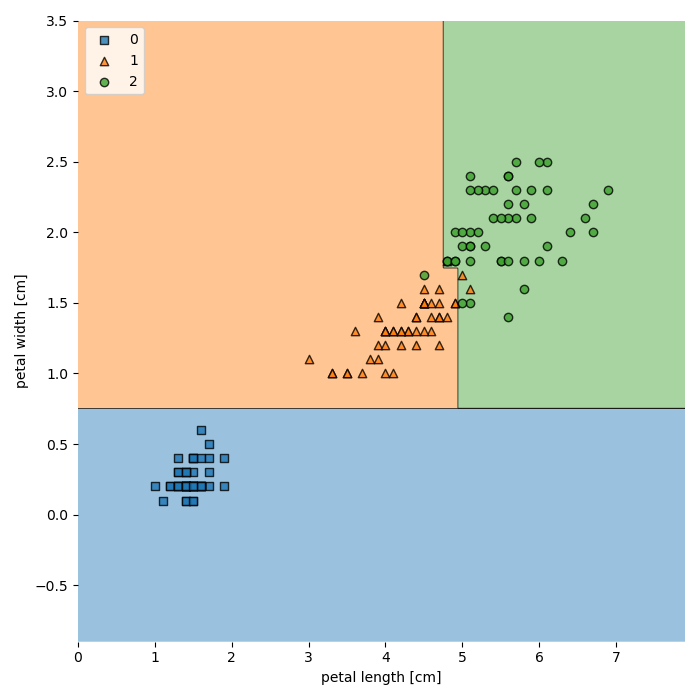

In [69]:
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
clf_tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
clf_tree.fit(X_train, y_train)

from mlxtend.plotting import plot_decision_regions

X_combined = np.vstack((X_train, X_test))

y_combined = np.hstack((y_train, y_test))


fig, ax = plt.subplots(figsize=(7, 7))

plot_decision_regions(X_combined, y_combined, clf=clf_tree)

plt.xlabel('petal length [cm]')

plt.ylabel('petal width [cm]')

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


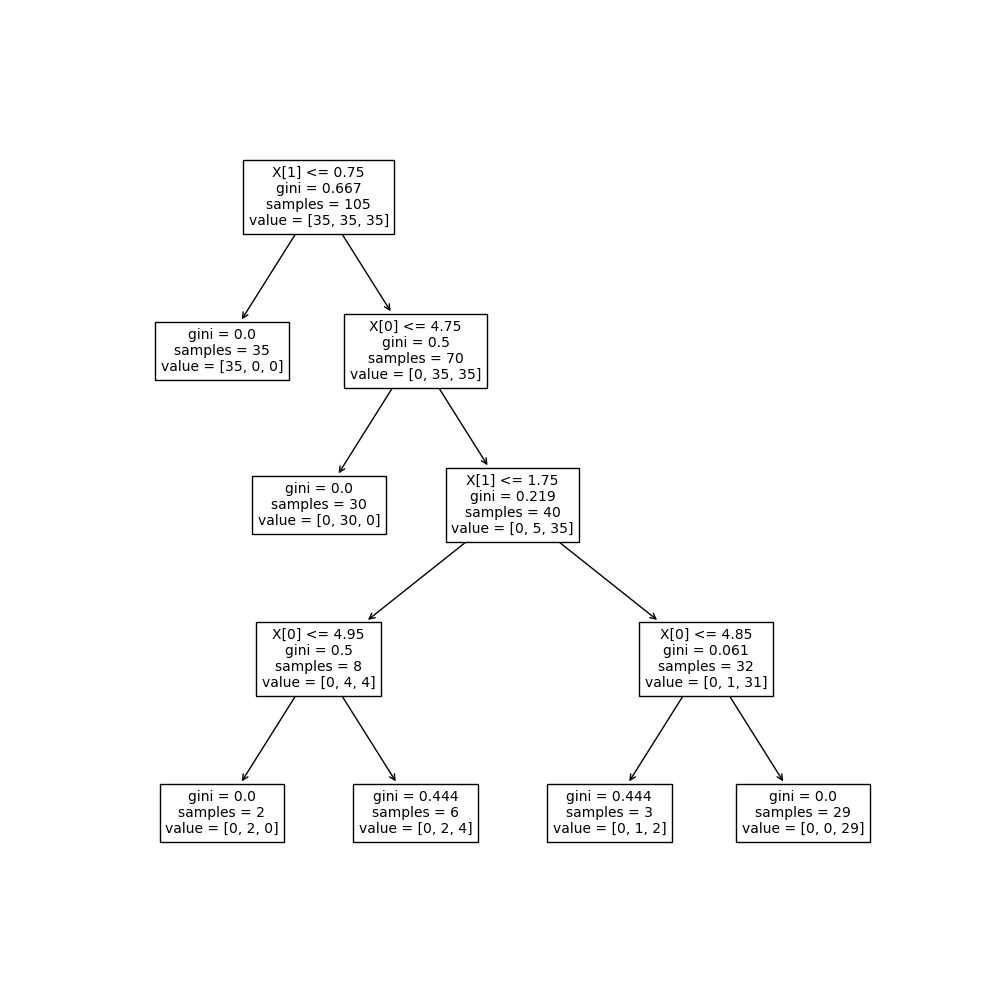

In [34]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(clf_tree, fontsize=10)
plt.show()